In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/user/Downloads/online_bank.csv', encoding = "ISO-8859-1")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
df.shape

(541909, 8)

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
column_types = df.dtypes
print(column_types)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [7]:
df.drop(columns=['CustomerID'],inplace=True)

In [8]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [9]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 541909, dtype: int64

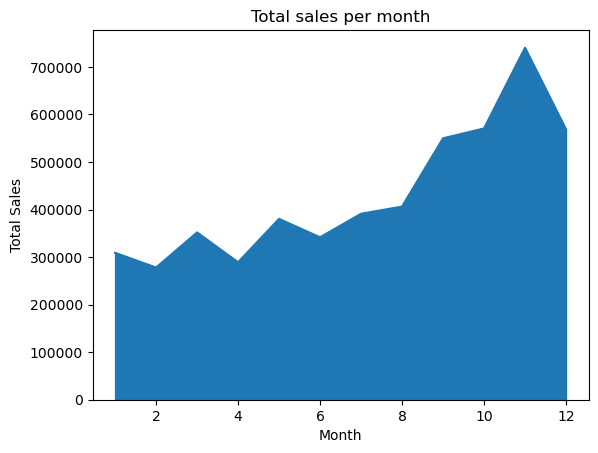

In [10]:
monthly_sales = df.groupby(df['InvoiceDate'].dt.month)['Quantity'].sum()
monthly_sales.plot(kind='area')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total sales per month')
plt.show()

Text(0, 0.5, 'Orders')

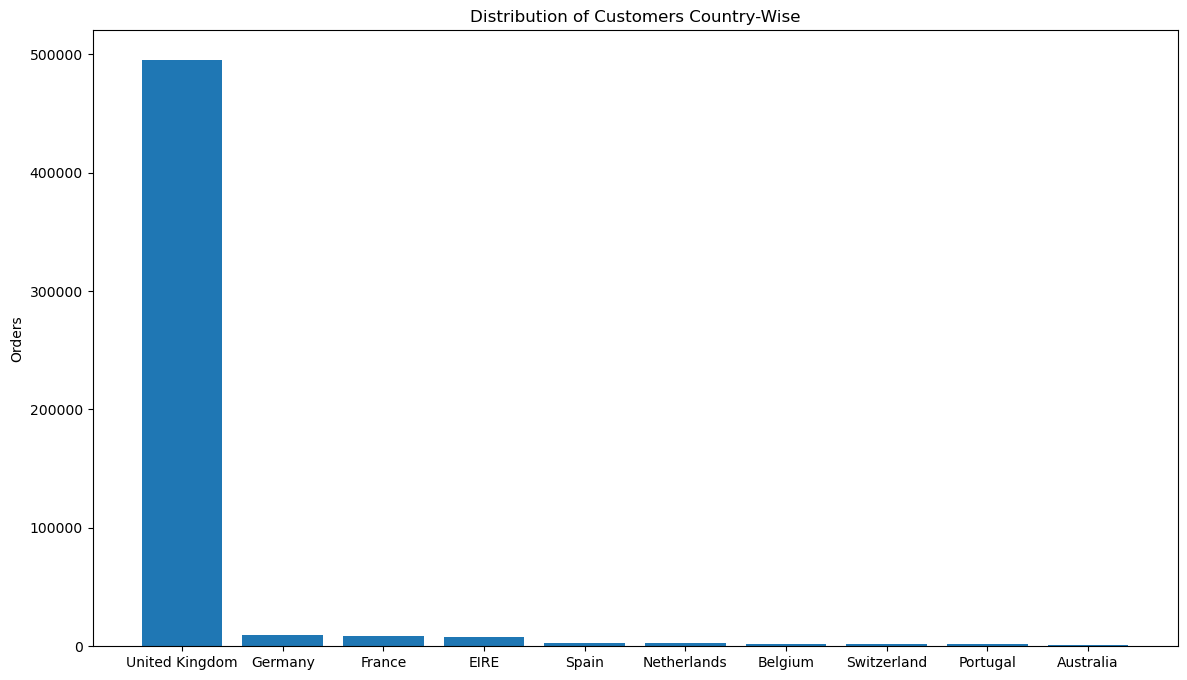

In [11]:
country = df['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ["Country","Counts"]
plt.figure(figsize=(14, 8))  
plt.bar(data=country,x='Country',height='Counts')
plt.title('Distribution of Customers Country-Wise')
plt.ylabel('Orders')

In [12]:
df.UnitPrice.describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [13]:
q1 = np.percentile(df.UnitPrice, 25)
q3 = np.percentile(df.UnitPrice, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x24927235bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x24927c1bb50>,
 'boxes': [<matplotlib.lines.Line2D at 0x24927c08e50>],
 'medians': [<matplotlib.lines.Line2D at 0x24927c28a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x24927c28cd0>],
 'means': []}

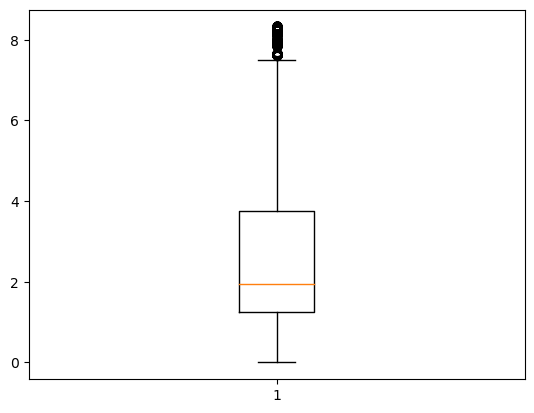

In [14]:
plt.boxplot(df['UnitPrice'])

In [15]:
df.Quantity.describe()

count    502282.000000
mean         10.109227
std         226.501200
min      -80995.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [16]:
df['Quantity'] = df['Quantity'].abs()


In [17]:
df.Quantity.describe()

count    502282.000000
mean         12.024144
std         226.407619
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [18]:
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

df.drop(columns=['InvoiceDate','Description','InvoiceNo'], inplace=True)

In [19]:
from sklearn.preprocessing import LabelEncoder

obj_columns = df.select_dtypes(include=['object']).columns

lb = LabelEncoder()

for col in obj_columns:
    df[col] = lb.fit_transform(df[col])

In [20]:
df.head()

,StockCode,Quantity,UnitPrice,Country,Year,Month,Day
0,3440,6,2.55,36,2010,12,1
1,2724,6,3.39,36,2010,12,1
2,2969,8,2.75,36,2010,12,1
3,2914,6,3.39,36,2010,12,1
4,2913,6,3.39,36,2010,12,1


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Country'])
y = df["Country"]

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [22]:
X_train

,StockCode,Quantity,UnitPrice,Year,Month,Day
352592,2162,4,1.25,2011,9,21
510932,463,4,1.25,2011,11,29
526586,1408,4,3.95,2011,12,5
524376,3354,24,1.25,2011,12,5
123760,2965,2,1.25,2011,3,17
...,...,...,...,...,...,...
282280,2881,6,2.55,2011,7,28
396137,1372,12,1.95,2011,10,13
144754,1267,12,0.85,2011,4,4
160869,2025,1,2.46,2011,4,18


In [23]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
import torch
from torch import nn 

class Model(nn.Module) :
    def __init__(self,input_features,output_features,hidden_layeres=8) : 
        
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_layeres),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_layeres, out_features=hidden_layeres),
            nn.ReLU(),
            nn.Linear(in_features=hidden_layeres, out_features=output_features), # how many classes are there?
        )
    
    def forward(self,x) :
        return self.linear_layer_stack(x)

input_features = X.shape[1]
output_features = df.Country.nunique()
Model = Model(input_features=input_features,output_features=output_features,hidden_layeres=8)
Model

Model(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=6, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=38, bias=True)
  )
)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(Model.parameters(),lr=0.1)

In [28]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train = torch.tensor(y_train_encoded, dtype=torch.long)
y_test = torch.tensor(y_test_encoded, dtype=torch.long)



In [29]:
torch.manual_seed(42)
epochs = 100
for epoch in range(epochs) :
    
    Model.train()
    
    y_train_pred = Model(X_train)
    
    train_loss = loss_fn(y_train_pred,y_train)
    
    optimizer.zero_grad()
    
    train_loss.backward()
    
    optimizer.step()

    Model.eval()
    
    with torch.inference_mode() :

        y_test_pred = Model(X_test)

        test_loss = loss_fn(y_test_pred, y_test)
    
    if epoch % 10 == 0 :
        print(f"Epoch : {epoch} | Loss : {train_loss} | test loss : {test_loss} ")
    

Epoch : 0 | Loss : 3.6805715560913086 | test loss : 3.594118356704712 
Epoch : 10 | Loss : 2.7546281814575195 | test loss : 2.6478097438812256 
Epoch : 20 | Loss : 1.4330511093139648 | test loss : 1.2993792295455933 
Epoch : 30 | Loss : 0.6895154714584351 | test loss : 0.6775614619255066 
Epoch : 40 | Loss : 0.6138700246810913 | test loss : 0.6178039312362671 
Epoch : 50 | Loss : 0.6014333367347717 | test loss : 0.6069495677947998 
Epoch : 60 | Loss : 0.5958209037780762 | test loss : 0.601534366607666 
Epoch : 70 | Loss : 0.5913963913917542 | test loss : 0.5970867276191711 
Epoch : 80 | Loss : 0.5873522758483887 | test loss : 0.5929732918739319 
Epoch : 90 | Loss : 0.5835366249084473 | test loss : 0.5890789031982422 
